In [2]:
!pip install kaggle

In [3]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c phi2018task3

  0% 0.00/4.73k [00:00<?, ?B/s]
100% 4.73k/4.73k [00:00<00:00, 4.11MB/s]
  0% 0.00/25.8k [00:00<?, ?B/s]
100% 25.8k/25.8k [00:00<00:00, 23.9MB/s]
100% 55.0M/55.1M [00:01<00:00, 36.9MB/s]
100% 55.1M/55.1M [00:01<00:00, 49.6MB/s]
 98% 209M/214M [00:03<00:00, 77.1MB/s]
100% 214M/214M [00:03<00:00, 64.4MB/s]


In [6]:
!ls
!unzip X_train.npy
!unzip X_test.npy

kaggle.json  sample_submission.csv  X_train.npy.zip
sample_data  X_test.npy.zip	    y_train.npy
Archive:  X_train.npy.zip
  inflating: X_train.npy             
Archive:  X_test.npy.zip
  inflating: X_test.npy              


Archive:  X_test.npy.zip
  inflating: X_test.npy              


In [1]:
import numpy as np
X1 = np.load('X_train.npy')
print(X1.shape)
X_test = np.load('X_test.npy')
print(X_test.shape)
y_train1 = np.load('y_train.npy')
print(y_train1.shape)

(4337, 224, 224, 3)
(1085, 224, 224, 3)
(4337,)


In [8]:
print(y_train1)

[1 0 1 ... 0 0 0]


In [8]:
y_test = []
print(X_test.shape[0])
for i in range(X_test.shape[0]):
  y_test.append(1)
  

print(y_test)

824
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
y_test = np.array((y_test))

In [10]:
print(y_test.shape)

(824,)


In [2]:
def y_out(y, num_classes = 2):
  y1 = np.zeros((y.shape[0],num_classes))
  for i in range(len(y)):
    y1[i,y[i]] = 1
  
  return y1


y_train1 = y_out(y_train1)
y_train = y_train1[:3800]
y_val = y_train1[3800:]
X_train = X1[:3800]
X_val = X1[3800:]
print(X_train.shape)
print(X_val.shape)

(3800, 224, 224, 3)
(537, 224, 224, 3)


In [3]:
print(y_train.shape)
print(y_val.shape)

(3800, 2)
(537, 2)


In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import optimizers
from keras.layers import Dense, Flatten, Activation, Dropout
from keras import applications
from keras.applications import VGG16, InceptionV3, ResNet50

image_size = 224

vgg_conv =  VGG16(weights = 'imagenet', include_top = False, input_shape=(image_size, image_size, 3))

vgg_conv.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [5]:
from keras.models import Sequential, Model, load_model

#vgg_conv.load_weights(weights_path)

x = Flatten()(vgg_conv.get_layer('block5_pool').output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputs = vgg_conv.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(lr=0.00007, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics = ['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

batch_size = 50
epochs = 30

train_datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip=True)

history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size = batch_size),
                             steps_per_epoch = X_train.shape[0] // batch_size,
                             epochs = epochs,
                             validation_data = (X_val, y_val),
                             callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
76/76 [==============================] - 134s 2s/step - loss: 0.7847 - acc: 0.7666 - val_loss: 0.3505 - val_acc: 0.8808
Epoch 2/30
76/76 [==============================] - 115s 2s/step - loss: 0.2785 - acc: 0.8850 - val_loss: 0.2722 - val_acc: 0.8845
Epoch 3/30
76/76 [==============================] - 115s 2s/step - loss: 0.2173 - acc: 0.9147 - val_loss: 0.2234 - val_acc: 0.8939
Epoch 4/30
76/76 [==============================] - 115s 2s/step - loss: 0.1664 - acc: 0.9300 - val_loss: 0.1029 - val_acc: 0.9628
Epoch 5/30
76/76 [==============================] - 115s 2s/step - loss: 0.1259 - acc: 0.9532 - val_loss: 0.1046 - val_acc: 0.9572
Epoch 6/30
76/76 [==============================] - 115s 2s/step - loss: 0.1177 - acc: 0.9516 - val_loss: 0.1242 - val_acc: 0.9516
Epoch 7/30
76/76 [==============================] - 115s 2s/step - loss: 0.1080 - acc: 0.9637 - val_loss: 0.1302 - val_acc: 0.9367
Epoch 8/30
76/76 [=================

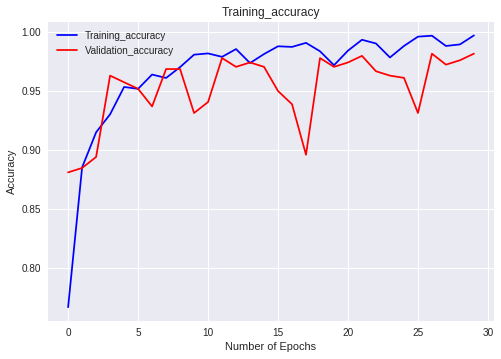

<Figure size 576x396 with 0 Axes>

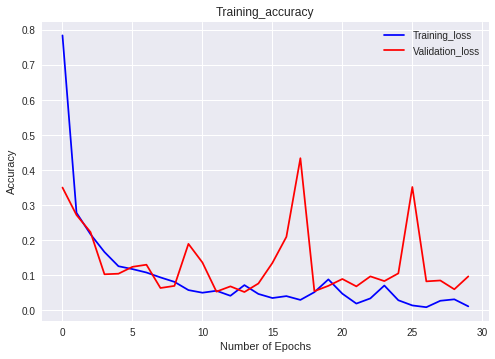

In [7]:
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']



epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label = 'Training_accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training_accuracy')
plt.legend()

plt.figure()
plt.show()

print(" ")
print(" ")

plt.plot(epochs, train_loss, 'b', label = 'Training_loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training_accuracy')
plt.legend()